# Visualizacion de los datos


In [ ]:
# cargamos librerías necesarias
import numpy as np
import pandas as pd
import zipfile

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install feature.engine

In [ ]:
ARG_csv = pd.read_csv('/content/EMSE_DatosAbiertos.csv', sep= ';', decimal='.')
pd.options.display.max_columns = None #Para poder ver todas la columnas ya que trasponiendo son 89 colunas y me continua poniendo puntos suspensivos
ARG_csv.head()

In [ ]:

print(ARG_csv.shape)

In [ ]:
ARG_csv.head()

In [ ]:
print(ARG_csv.isnull().sum())
#print(ARG_csv.dtypes)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##PREPROCESADO

In [ ]:
def drop_null_columns(df, threshold):
    null_column=[]
    for column in df.columns:
        null_percentage = df[column].isnull().sum() / len(df) * 100
        if null_percentage > threshold:
            print(f"El porcentaje de valores nulos en la columna {column} es mayor al {threshold}% es de {null_percentage}")
            null_column.append(column)
    print("Columnas null: ",null_column )
    print("numero de columnas null: ",len(null_column) )
    for column in null_column:
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
df_procesado = drop_null_columns(ARG_csv, 37)

In [ ]:
df_procesado.shape

In [ ]:
import pandas as pd



In [ ]:
df_procesado.head()

Eliminamos todas las columnas que no tengan información o que son datos repetidos

In [ ]:
def drop_columns(df, columns_to_drop):
    for column in columns_to_drop:
        df.drop(column, axis=1, inplace=True)
    return df

In [ ]:
columns_to_drop = ["sitio", "record", "weight", "stratum", "psu", "q59", "q60", "q64", "q65", "q69", "q70", "q71", "q72", "q73", "q74", "q75", "q76", "q77", "q78", "q79", "q80", "q81", "qn59", "qn60", "qn64", "qn65", "qn70", "qn76", "qn77", "qn78", "qn79", "qn80", "qn81","q66 Bullied on school property in past 12 months","q67 Bullied not on school property in past 12 months","q68 Cyber bullied in past 12 months"]
df = drop_columns(df_procesado, columns_to_drop)

In [ ]:
columns_to_drop=["qn10 Did not eat food from a fast food restaurant (qn10)","qnff1g Ate food from a fast food restaurant one or more days", "qnff3g Ate food from a fast food restaurant three or more days", "qn15 Were physically attacked ", "qn16 Were in a physical fight", "qn17 Were seriously injured", "qn22 Most of the time or always felt lonely ", "qn23 Most of the time or always were so worried about something that they could not sleep at night", "qn24 Seriously considered attempting suicide", "qn25 Made a plan about how they would attempt suicide", "qn26 Attempted suicide", "qn27 Did not have any close friends", "qn29 Currently smoked cigarettes", "qn30 Currently used any tobacco products other than cigarettes", "qntob2g Currently used any tobacco product", "qnff2g Ate food from a fast food restaurant two or more days", "qn32 Reported that people smoked in their presence", "qn33 Had parents or guardians who used any form of tobacco", "qn34 Drank alcohol before age 14 years", "qn35 Currently drank alcohol", "qn38 Ever drank so much alcohol that they were really drunk", "qn39 Ever got into trouble with their family or friends, missed school, or got into fights as a result of drinking alcohol ", "qn41 Ever used marijuana ", "qn42 Currently used marijuana", "qn43 Ever used amphethamines or methamphetamines", "qn44 Ever had sexual intercourse", "qn46 Had sexual intercourse with two or more persons", "qn49 Were not physically active", "qnpa5g Were physically active at least 60 minutes per day on 5 or more days", "qnpa7g Were physically active at least 60 minutes per day on all 7 days", "qn50 Did not walk or ride a bicycle to or from school", "qn51 Did not attend physical education classes", "qnpe3g Attended physical education classes on three or more days", "qnpe5g Attended physical education classes on five or more days", "qn52 Spent three or more hours per day doing sitting activities", "qn54 Reported that most of the students in their school were most of the time or always kind and helpful", "qn55 Reported that their parents or guardians most of the time or always checked to see if their homework was done", "qn56 Reported that their parents or guardians most of the time or always understood their problems and worries", "qn57 Reported that their parents or guardians most of the time or always really knew what they were doing with their free time", "qn58 Reported that their parents or guardians never or rarely went through their things without their approval ", "qn61 Ate fruit two or more times per day in past 7 days", "qn62 Ate vegetables two or more times per day in past 7 days", "qn63 Drank carbonated soft drink one or more times per day in past 7 days","qnnotb2g Did not currently use any tobacco products"]
df = drop_columns(df, columns_to_drop)

In [ ]:
columns_to_drop=["q30 Other tobacco use", "q31 Smoking cessation","q32 Smoking in their presence", "q33 Parental tobacco use", "q61 Fruit consumption past 7 days","q62 Vegetable consumption past 7 days", "q63 Soft drink consumption past 7 days ","qn69 Were underweight"]
df = drop_columns(df, columns_to_drop)

In [ ]:
df.shape

In [ ]:
df = df.dropna(subset=['q15 Physically attacked'], axis=0)
df = df.dropna(subset=['qn66 Bullied on school property in past 12 months','qn67 Bullied not on school property in past 12 months','qn68 Cyber bullied in past 12 months'], axis=0)

In [ ]:
df.head(177)

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese
1,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
2,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,NaN,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,NaN,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,NaN,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0
4,3.0,2.0,2.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2.0,3.0,2.0,2.0,1.0,4.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
5,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
6,4.0,2.0,4.0,NaN,NaN,3.0,6.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,6.0,4.0,1.0,4.0,2.0,5.0,5.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN
7,2.0,2.0,4.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,1.0,1.0,4.0,2.0,1.0,5.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN
8,3.0,1.0,4.0,NaN,NaN,4.0,1.0,2.0,3.0,3.0,8.0,3.0,1.0,4.0,2.0,1.0,2.0,4.0,NaN,1.0,5.0,6.0,6.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,4.0,8.0,6.0,6.0,4.0,4.0,5.0,4.0,5.0,3.0,2.0,2.0,2.0,NaN,NaN,NaN
9,4.0,2.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,NaN,1.0,3.0,1.0,1.0,5.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN
10,5.0,1.0,2.0,1.64,45.0,1.0,5.0,1.0,2.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,1.0,4.0,3.0,3.0,5.0,2.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,1.0,2.0,3.0,8.0,6.0,6.0,3.0,4.0,5.0,5.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
# Cuenta los valores nulos en cada fila
null_counts = df.isnull().sum(axis=1)

# Crea una columna que indica si más de la mitad de los valores son nulos
df['mas_de_la_mitad_nulos'] = null_counts > (df.shape[1]/2)

# Elimina las filas donde más de la mitad de los valores son nulos
df = df[~df['mas_de_la_mitad_nulos']].reset_index(drop=True)

In [ ]:
df.shape


(54910, 52)

In [ ]:
df.drop('mas_de_la_mitad_nulos', axis=1, inplace=True)

##Rellenamos los Nulls con KNNImputer

In [ ]:
from sklearn.impute import KNNImputer

# Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear una instancia de KNNImputer con el número de vecinos deseado
imputer = KNNImputer(n_neighbors=5)

# Imputar los valores faltantes
imputed_data = imputer.fit_transform(df[num_cols])

# Actualizar el DataFrame con los valores imputados
df[num_cols] = imputed_data

In [ ]:
df.shape

In [ ]:
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese
0,3.0,2.0,2.0,1.62,52.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,3.4,3.4,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,3.0,2.0,2.0,1.56,45.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/depurado.csv', index=False)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from keras.optimizers import SGD

##Physically attacked Model



In [ ]:
unique_values = df['q15 Physically attacked'].unique()
print(unique_values)

[1. 2. 8. 3. 4. 6. 7. 5.]


In [ ]:
df['bullying'] = 0

In [ ]:
for i in range(len(df)):
  if df.loc[i, 'q15 Physically attacked'] == 1:
    df.loc[i, 'bullying'] = 0
  if df.loc[i, 'q15 Physically attacked'] > 1:
    df.loc[i, 'bullying'] = 1   
  

In [ ]:
res_sin = df.loc[df['bullying'] == 0]
res_1 = df.loc[df['bullying'] == 1]
print (f'sin bullying: {res_sin.shape} {100*(res_sin.shape[0]/df.shape[0])}\ncon 1 bullying: {res_1.shape} {100*(res_1.shape[0]/df.shape[0])}\n' )

sin bullying: (45718, 52) 83.25987980331452
con 1 bullying: (9192, 52) 16.740120196685485



In [ ]:
df.head()

,q1 Custom Age,q2 Sex,q3 In what grade are you,q4 How tall are you,q5 How much do you weigh,q6 How often went hungry,q10 Fast food eating,q15 Physically attacked,q16 Physical fighting,q17 Seriously injured,q18 Serious injury type,q19 Serious injury cause,q22 Felt lonely,q23 Could not sleep,q24 Considered suicide,q25 Made a suicide plan,q26 Attempted suicide,q27 Close friends,q28 Initiation of cigarette use,q29 Current cigarette use,q34 Initiation of alcohol use,q35 Current alcohol use,q36 Drank 2+ drinks,q37 Source of alchohol,q38 Really drunk,q39 Trouble from drinking,q40 Initiation of drug use,q41 Ever marijuana use,q42 Current marijuana use,q43 Amphethamine or methamphetamine use,q44 Ever sexual intercourse,q45 Age first had sex,q46 Number of sex partners,q47 Condom use,q48 Birth control used,q49 Physical activity past 7 days,q50 Walk or bike to school,q51 PE attendance,q52 Sitting activities,q53 Miss school no permission,q54 Other students kind and helpful,q55 Parents check homework,q56 Parents understand problems,q57 Parents know about free time,q58 Parents go through their things,qn66 Bullied on school property in past 12 months,qn67 Bullied not on school property in past 12 months,qn68 Cyber bullied in past 12 months,qnunwtg,qnowtg Were overweight,qnobeseg Were obese,bullying
0,3.0,2.0,2.0,1.62,52.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,6.0,3.0,1.0,2.0,1.0,3.0,3.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0
1,4.0,1.0,4.0,1.67,56.0,1.0,1.0,1.0,1.0,3.0,2.0,8.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,7.0,6.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
2,6.0,1.0,2.0,1.73,70.0,1.0,4.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,1.0,4.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,4.0,5.0,1.0,6.0,3.0,1.0,3.0,1.0,3.4,3.4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0
3,3.0,2.0,2.0,1.56,45.4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,2.0,1.8,2.0,0
4,3.0,1.0,2.0,1.72,48.0,1.0,3.0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,4.0,1.0,1.0,5.0,2.0,3.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,4.0,5.0,5.0,5.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0


In [ ]:
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x = df.drop(labels=['q15 Physically attacked','bullying','qn66 Bullied on school property in past 12 months', 'qn67 Bullied not on school property in past 12 months','qn68 Cyber bullied in past 12 months'], axis=1)
print(x.head())
y=df['bullying']

   q1 Custom Age  q2 Sex  q3 In what grade are you  q4 How tall are you  \
0            3.0     2.0                       2.0                 1.62   
1            4.0     1.0                       4.0                 1.67   
2            6.0     1.0                       2.0                 1.73   
3            3.0     2.0                       2.0                 1.56   
4            3.0     1.0                       2.0                 1.72   

   q5 How much do you weigh  q6 How often went hungry  q10 Fast food eating   \
0                      52.8                       1.0                    1.0   
1                      56.0                       1.0                    1.0   
2                      70.0                       1.0                    4.0   
3                      45.4                       1.0                    1.0   
4                      48.0                       1.0                    3.0   

   q16 Physical fighting  q17 Seriously injured  q18 Serious injury 

In [ ]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
# Aplicar la función fit_resample para obtener los datos balanceados
X_res, y_res = sm.fit_resample(x, y)

In [ ]:
# Contar el número de valores 0 y 1
num_zeros = np.sum(y_res == 0)
num_ones = np.sum(y_res == 1)

# Imprimir los resultados
print("Número de ceros: ", num_zeros)
print("Número de unos: ", num_ones)

Número de ceros:  45718
Número de unos:  45718


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_res = scaler.fit_transform(X_res)
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.15,shuffle=True,random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10,shuffle=True, random_state=42)
num_classes = 2
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

##MODELO FINAL

[INFO]: Entrenando red neuronal...
Epoch 1/500
350/350 [==============================] - 2s 4ms/step - loss: 4.9053 - accuracy: 0.6403 - val_loss: 3.1575 - val_accuracy: 0.6770
Epoch 2/500
350/350 [==============================] - 1s 3ms/step - loss: 2.2915 - accuracy: 0.6768 - val_loss: 1.6519 - val_accuracy: 0.6882
Epoch 3/500
350/350 [==============================] - 1s 3ms/step - loss: 1.3294 - accuracy: 0.6810 - val_loss: 1.0826 - val_accuracy: 0.6873
Epoch 4/500
350/350 [==============================] - 1s 3ms/step - loss: 0.9631 - accuracy: 0.6814 - val_loss: 0.8608 - val_accuracy: 0.6875
Epoch 5/500
350/350 [==============================] - 1s 3ms/step - loss: 0.8136 - accuracy: 0.6821 - val_loss: 0.7676 - val_accuracy: 0.6781
Epoch 6/500
350/350 [==============================] - 1s 3ms/step - loss: 0.7466 - accuracy: 0.6839 - val_loss: 0.7224 - val_accuracy: 0.6805
Epoch 7/500
350/350 [==============================] - 1s 3ms/step - loss: 0.7141 - accuracy: 0.6840 - val_

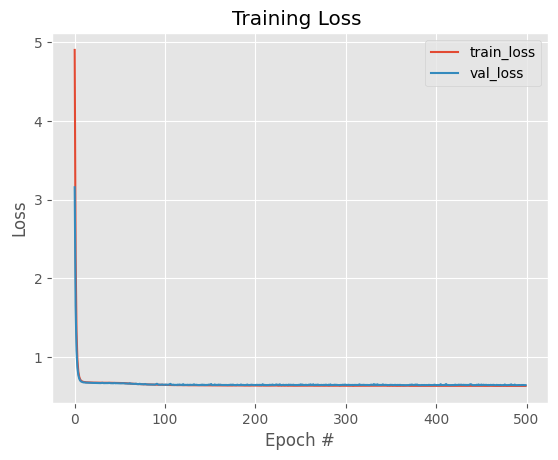

In [ ]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 500
batch_size = 200

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Flatten())
model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

# Compilamos y entrenamos el modelo con el optimizador Adam y una tasa de aprendizaje de 0.001
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=learning_rate)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

# Guardar el modelo
model.save("model_1.h5")

# Evaluando el modelo de predicción con los datos test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_test, batch_size=batch_size)

model.summary()
  # Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")

plt.title("Training Loss ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               24576     
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 flatten_2 (Flatten)         (None, 32)               

##Evaluación Del Modelo

In [ ]:
# Obtener las predicciones del modelo
predictions = model.predict(x_test)

# Convertir las predicciones en etiquetas discretas
predicted_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_labels, predicted_labels)
print("Precisión: {:.2f}%".format(accuracy * 100))

429/429 [==============================] - 1s 1ms/step
Precisión: 80.48%


In [ ]:
# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_labels,predicted_labels)))
print('\nClassification report:\n{}'.format(classification_report(y_test_labels, predicted_labels)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test_labels, predicted_labels)))

Confusion matrix:
[[5473 1355]
 [1323 5565]]

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      6828
           1       0.80      0.81      0.81      6888

    accuracy                           0.80     13716
   macro avg       0.80      0.80      0.80     13716
weighted avg       0.80      0.80      0.80     13716

Accuracy score: 0.8048


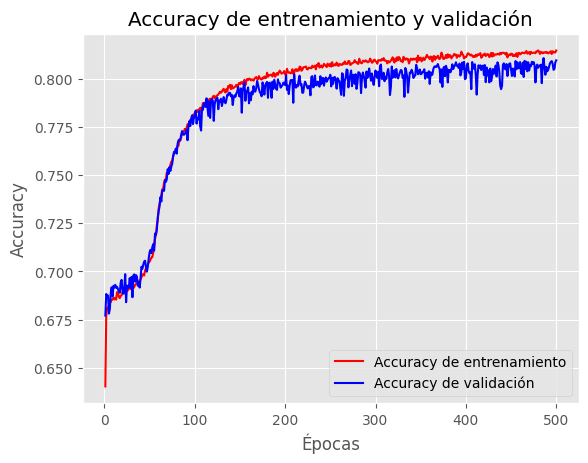

In [ ]:
# Entrenar el modelo y guardar el historial en la variable 'history'

# Obtener los valores del accuracy de entrenamiento y validación
train_acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

# Obtener la cantidad de épocas
epochs = range(1, len(train_acc) + 1)

# Graficar el accuracy de entrenamiento y validación
plt.plot(epochs, train_acc, 'r', label='Accuracy de entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Accuracy de validación')
plt.title('Accuracy de entrenamiento y validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

429/429 [==============================] - 1s 1ms/step


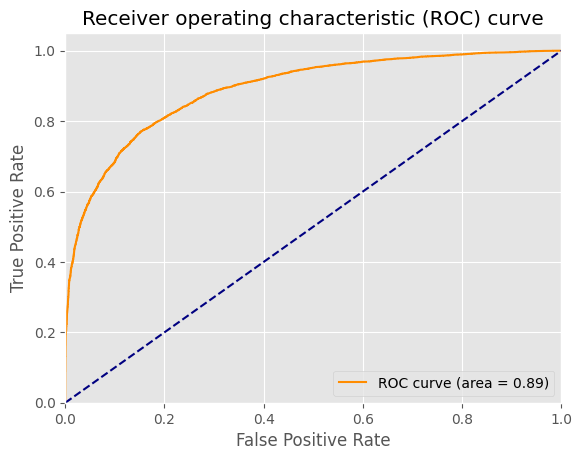

In [ ]:
# Obtener las probabilidades de las predicciones para la clase positiva
y_pred_proba = model.predict(x_test)[:, 1]
y_test_labels = np.argmax(y_test, axis=1)
fpr, tpr, thresholds = roc_curve(y_test_labels, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

##Hacemos una prueba para confirmar que trabajamos con los mejores hiperparametros:

In [ ]:
def train_model(x_train, y_train, x_val, y_val, activation_function_final, learning_rate, num_epochs, batch_size, model_filename):
    # Crear el modelo
    model = Sequential()
    model.add(Dense(1000, activation='relu', input_shape=(x_train.shape[1],), kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(400, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Flatten())
    model.add(Dense(2, activation=activation_function_final, kernel_regularizer=regularizers.l2(l=0.01)))

    # Compilar el modelo con el optimizador Adam y una tasa de aprendizaje
    opt = SGD(learning_rate=learning_rate)
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

    # Entrenar el modelo
    print("[INFO]: Entrenando red neuronal...")
    history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)

    # Evaluar el modelo en los datos de validación
    y_pred_proba = model.predict(x_val)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_val_labels = np.argmax(y_val, axis=1)
    accuracy = accuracy_score(y_val_labels, y_pred)
    confusion = confusion_matrix(y_val_labels, y_pred)
    classification = classification_report(y_val_labels, y_pred)

    # Guardar el modelo
    model.save(model_filename)

    return model, history, accuracy, confusion, classification

In [ ]:
activation_function_final = 'sigmoid'
learning_rate = 0.0001
num_epochs = 500
batch_size = 32
model_filename='model_5'
#{'activation_function_final': 'sigmoid', 'batch_size': 32, 'l2_reg': 0.01, 'learning_rate': 0.0001, 'loss': 'categorical_crossentropy', 'n_neuronas': 1000, 'n_neuronas_1': 400, 'optimizer': 'SGD'}"

In [ ]:
model, history, accuracy, confusion, classification = train_model(x_train, y_train,x_val, y_val, activation_function_final, learning_rate, num_epochs, batch_size, model_filename)

[INFO]: Entrenando red neuronal...
Epoch 1/500
2186/2186 [==============================] - 7s 3ms/step - loss: 10.0015 - accuracy: 0.5368 - val_loss: 9.9582 - val_accuracy: 0.5856
Epoch 2/500
2186/2186 [==============================] - 6s 3ms/step - loss: 9.9172 - accuracy: 0.5774 - val_loss: 9.8742 - val_accuracy: 0.6100
Epoch 3/500
2186/2186 [==============================] - 6s 3ms/step - loss: 9.8342 - accuracy: 0.5967 - val_loss: 9.7912 - val_accuracy: 0.6213
Epoch 4/500
2186/2186 [==============================] - 6s 3ms/step - loss: 9.7520 - accuracy: 0.6088 - val_loss: 9.7092 - val_accuracy: 0.6279
Epoch 5/500
2186/2186 [==============================] - 6s 3ms/step - loss: 9.6706 - accuracy: 0.6192 - val_loss: 9.6279 - val_accuracy: 0.6342
Epoch 6/500
2186/2186 [==============================] - 6s 3ms/step - loss: 9.5899 - accuracy: 0.6234 - val_loss: 9.5475 - val_accuracy: 0.6382
Epoch 7/500
2186/2186 [==============================] - 6s 3ms/step - loss: 9.5102 - accuracy

El resultado es peor que nuestro modelo final